<a href="https://colab.research.google.com/github/SiddhantGodwani/Computer-Vision-/blob/main/3_SIFT_Matching_between_two_images_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import sys
if 'google.colab' in sys.modules:
  import subprocess
  subprocess.call("pip install -U opencv-python".split())
  subprocess.call("wget https://raw.githubusercontent.com/YoniChechik/AI_is_Math/master/c_08_features/left.jpg".split())
  subprocess.call("wget https://raw.githubusercontent.com/YoniChechik/AI_is_Math/master/c_08_features/right.jpg".split())

In [7]:
from random import randrange
import matplotlib.pyplot as plt
import numpy as np
import cv2
figsize = (10, 10)

In [8]:
rgb_l = cv2.cvtColor(cv2.imread("left.jpg"), cv2.COLOR_BGR2RGB)
gray_l = cv2.cvtColor(rgb_l, cv2.COLOR_RGB2GRAY)
rgb_r = cv2.cvtColor(cv2.imread("right.jpg"), cv2.COLOR_BGR2RGB)
gray_r = cv2.cvtColor(rgb_r, cv2.COLOR_RGB2GRAY)
feature_extractor = cv2.SIFT_create()

In [9]:
# find the keypoints and descriptors with chosen feature_extractor
kp_l, desc_l = feature_extractor.detectAndCompute(gray_l, None)
kp_r, desc_r = feature_extractor.detectAndCompute(gray_r, None)
bf = cv2.BFMatcher()
matches = bf.knnMatch(desc_l, desc_r, k=2)

In [12]:
# Apply ratio test
good_and_second_good_match_list = []
for m in matches:
  if m[0].distance/m[1].distance < 0.5:
    good_and_second_good_match_list.append(m)
    good_match_arr = np.asarray(good_and_second_good_match_list)[:,0]

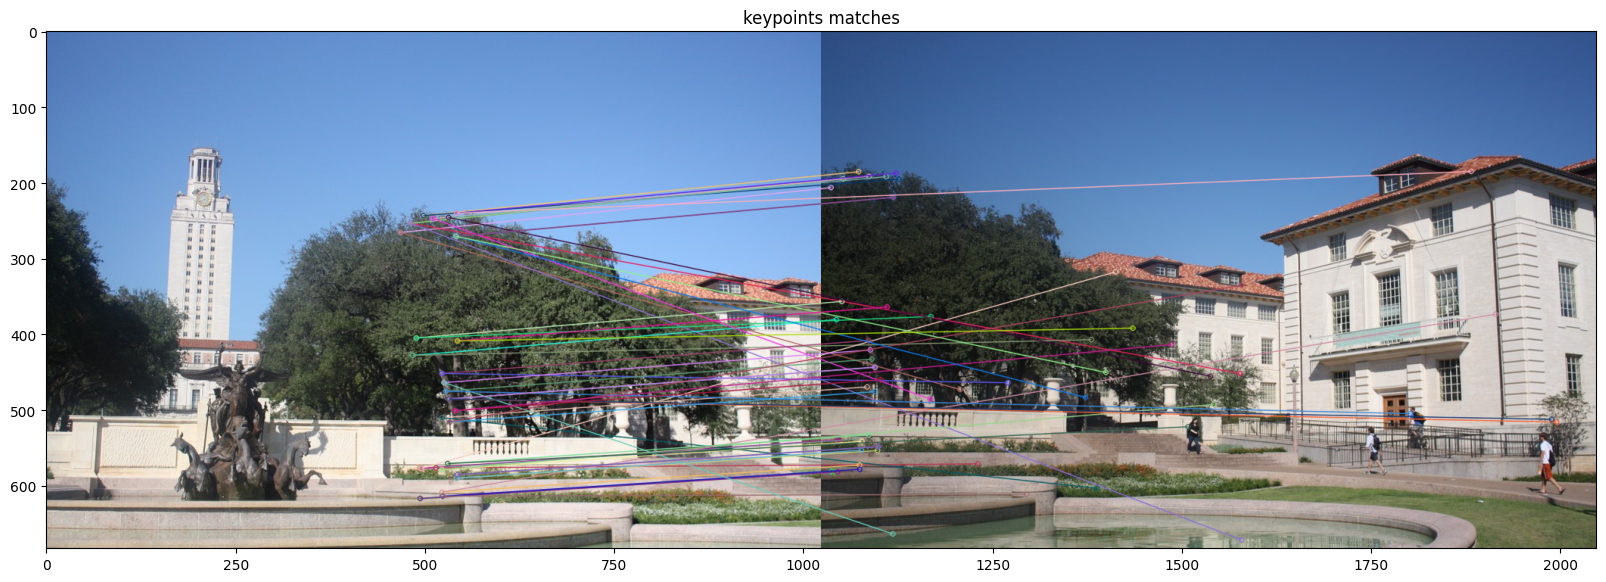

In [13]:
# show only 30 matches
im_matches = cv2.drawMatchesKnn(rgb_l, kp_l, rgb_r, kp_r,
good_and_second_good_match_list[0:30],
None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(20, 20))
plt.imshow(im_matches)
plt.title("keypoints matches")
plt.show()